In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## <span style="color:orange;"> 3. Connecting the Camera </span>

This time, we will be recording our own videos using the Arducam HM01B0, which is a small camera that can be hooked up to the Pico. 

### Wiring Instructions

Please make sure your microcontroller is not plugged to the computer while you are wiring things together. Ask the instructor if you are unsure about your wiring. Use your jumper wires to make the following connections.

| HM01B0 | Pico |
|--------|------|
| VCC    | 3V3  |
| SCL    | GP5  |
| SDA    | GP4  |
| VSYNC  | GP16 |
| HREF   | GP15 |
| PCLK   | GP14 |
| DO     | GP6  |
| GND    | GND  |

<!-- ![img](camera.jpg)

*Wiring the Arducam HM01B0 camera* 

![img](camerawiring.jpg)

*Connections to the PICO on breadboard* -->


After ensuring that the wiring is correct, hold down the BOOTSEL button on the Pico and plug it in. Download [arducam.uf2](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/2_Video_Labs/arducam.uf2) and copy it onto the Pico's drive, which should have popped up in your folders as an option. The Pico should automatically disconnect once the file has transferred, then its LED will start blinking rapidly. 

Once the Pico has been successfully connected, run the following cell to make sure we have detected the Pico successfully.

In [2]:
import time
import serial
from serial.tools import list_ports

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
COM4 BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&0001004C_PID&2012\7&FACD1E3&0&F8665A0717CC_C00000000
COM3 BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\7&FACD1E3&0&000000000000_00000000
COM5 USB VID:PID=2E8A:000A SER=E66118604B5F7321 LOCATION=1-4

selected port COM5 as most likely to have a raspberry pi pico


### Capturing a still image

Now that the Pico and camera have been connected, run the following cell to get a still image.

In [ ]:
buffer = bytearray(96 * 96)
sticky_note_img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    sticky_note_img.flat[::-1] = buffer

plt.imshow(sticky_note_img, cmap="gray")
plt.show()

In [5]:
sticky_note_img = Image.open(r'figures\sticky_note_img.png')

FileNotFoundError: [Errno 2] No such file or directory: 'figures\\sticky_note_img.png'

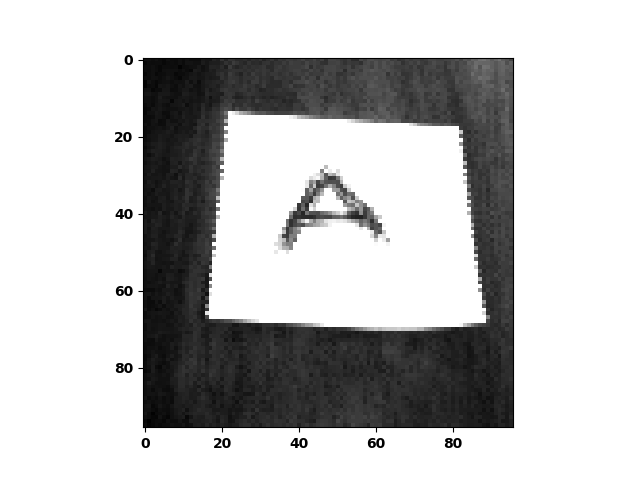

In [25]:
plt.imshow(sticky_note_img, cmap="gray")
plt.show()

In [30]:
### Save an array as a png ###

def save_array_as_png(array, file_name):
    # Convert the NumPy array to a PIL Image
    image = Image.fromarray(np.uint8(array))

    # Save the image
    image.save(file_name, 'PNG')
    
# Save the array as a PNG file
save_array_as_png(sticky_note_img, 'sticky_note.png')


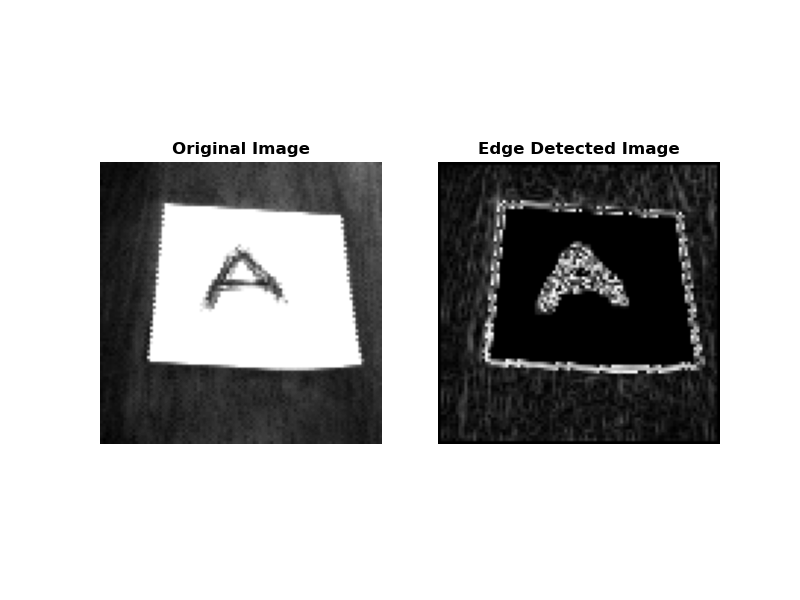

In [39]:
def sobel_edge_detection(image_array):
    # Define the Sobel filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Image dimensions
    rows, cols = image_array.shape

    # Create an empty array to store the edge detected image
    edge_image = np.zeros_like(image_array)

    # Apply Sobel filter to the image
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            gx = np.sum(np.multiply(image_array[i-1:i+2, j-1:j+2], sobel_x))
            gy = np.sum(np.multiply(image_array[i-1:i+2, j-1:j+2], sobel_y))
            
            # Calculate the gradient magnitude
            edge_image[i, j] = np.sqrt(gx**2 + gy**2)

    # Normalize the image to the range [0, 255]
    edge_image = np.clip((edge_image / np.max(edge_image)) * 255, 0, 255).astype(np.uint8)

    return edge_image

# Load an image and convert to grayscale
image = Image.open('sticky_note.png').convert('L')
image_array = np.array(image)

# Perform edge detection
edges = sobel_edge_detection(image_array)

# Plot the original and edge detected images
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.show()


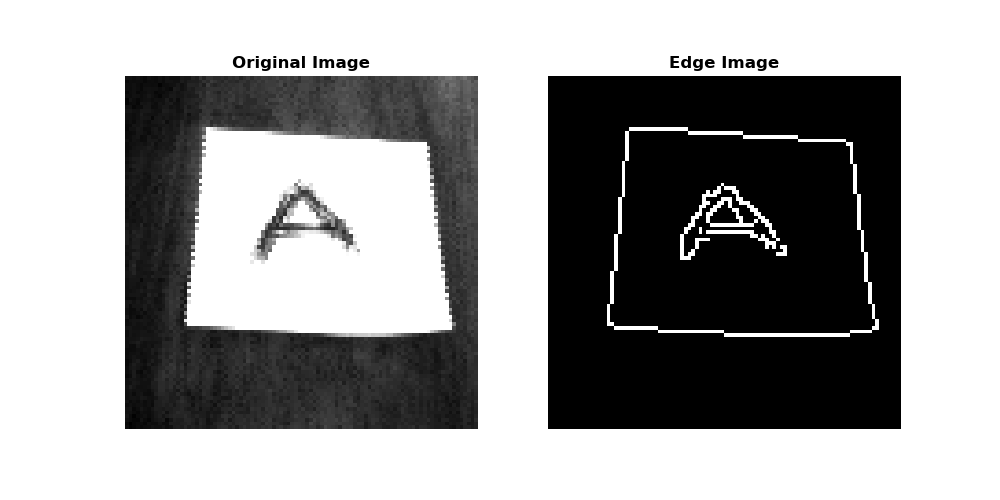

In [33]:
### Edge detection using OpenCV ###

def edge_detection(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    # Display the original and edged images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Image')
    plt.axis('off')

    plt.show()

# Replace 'path_to_image.jpg' with the path to your image file
edge_detection('sticky_note.png')
